# Numerical Methods in Scientific Computing
# Assignment 2

# Q1.
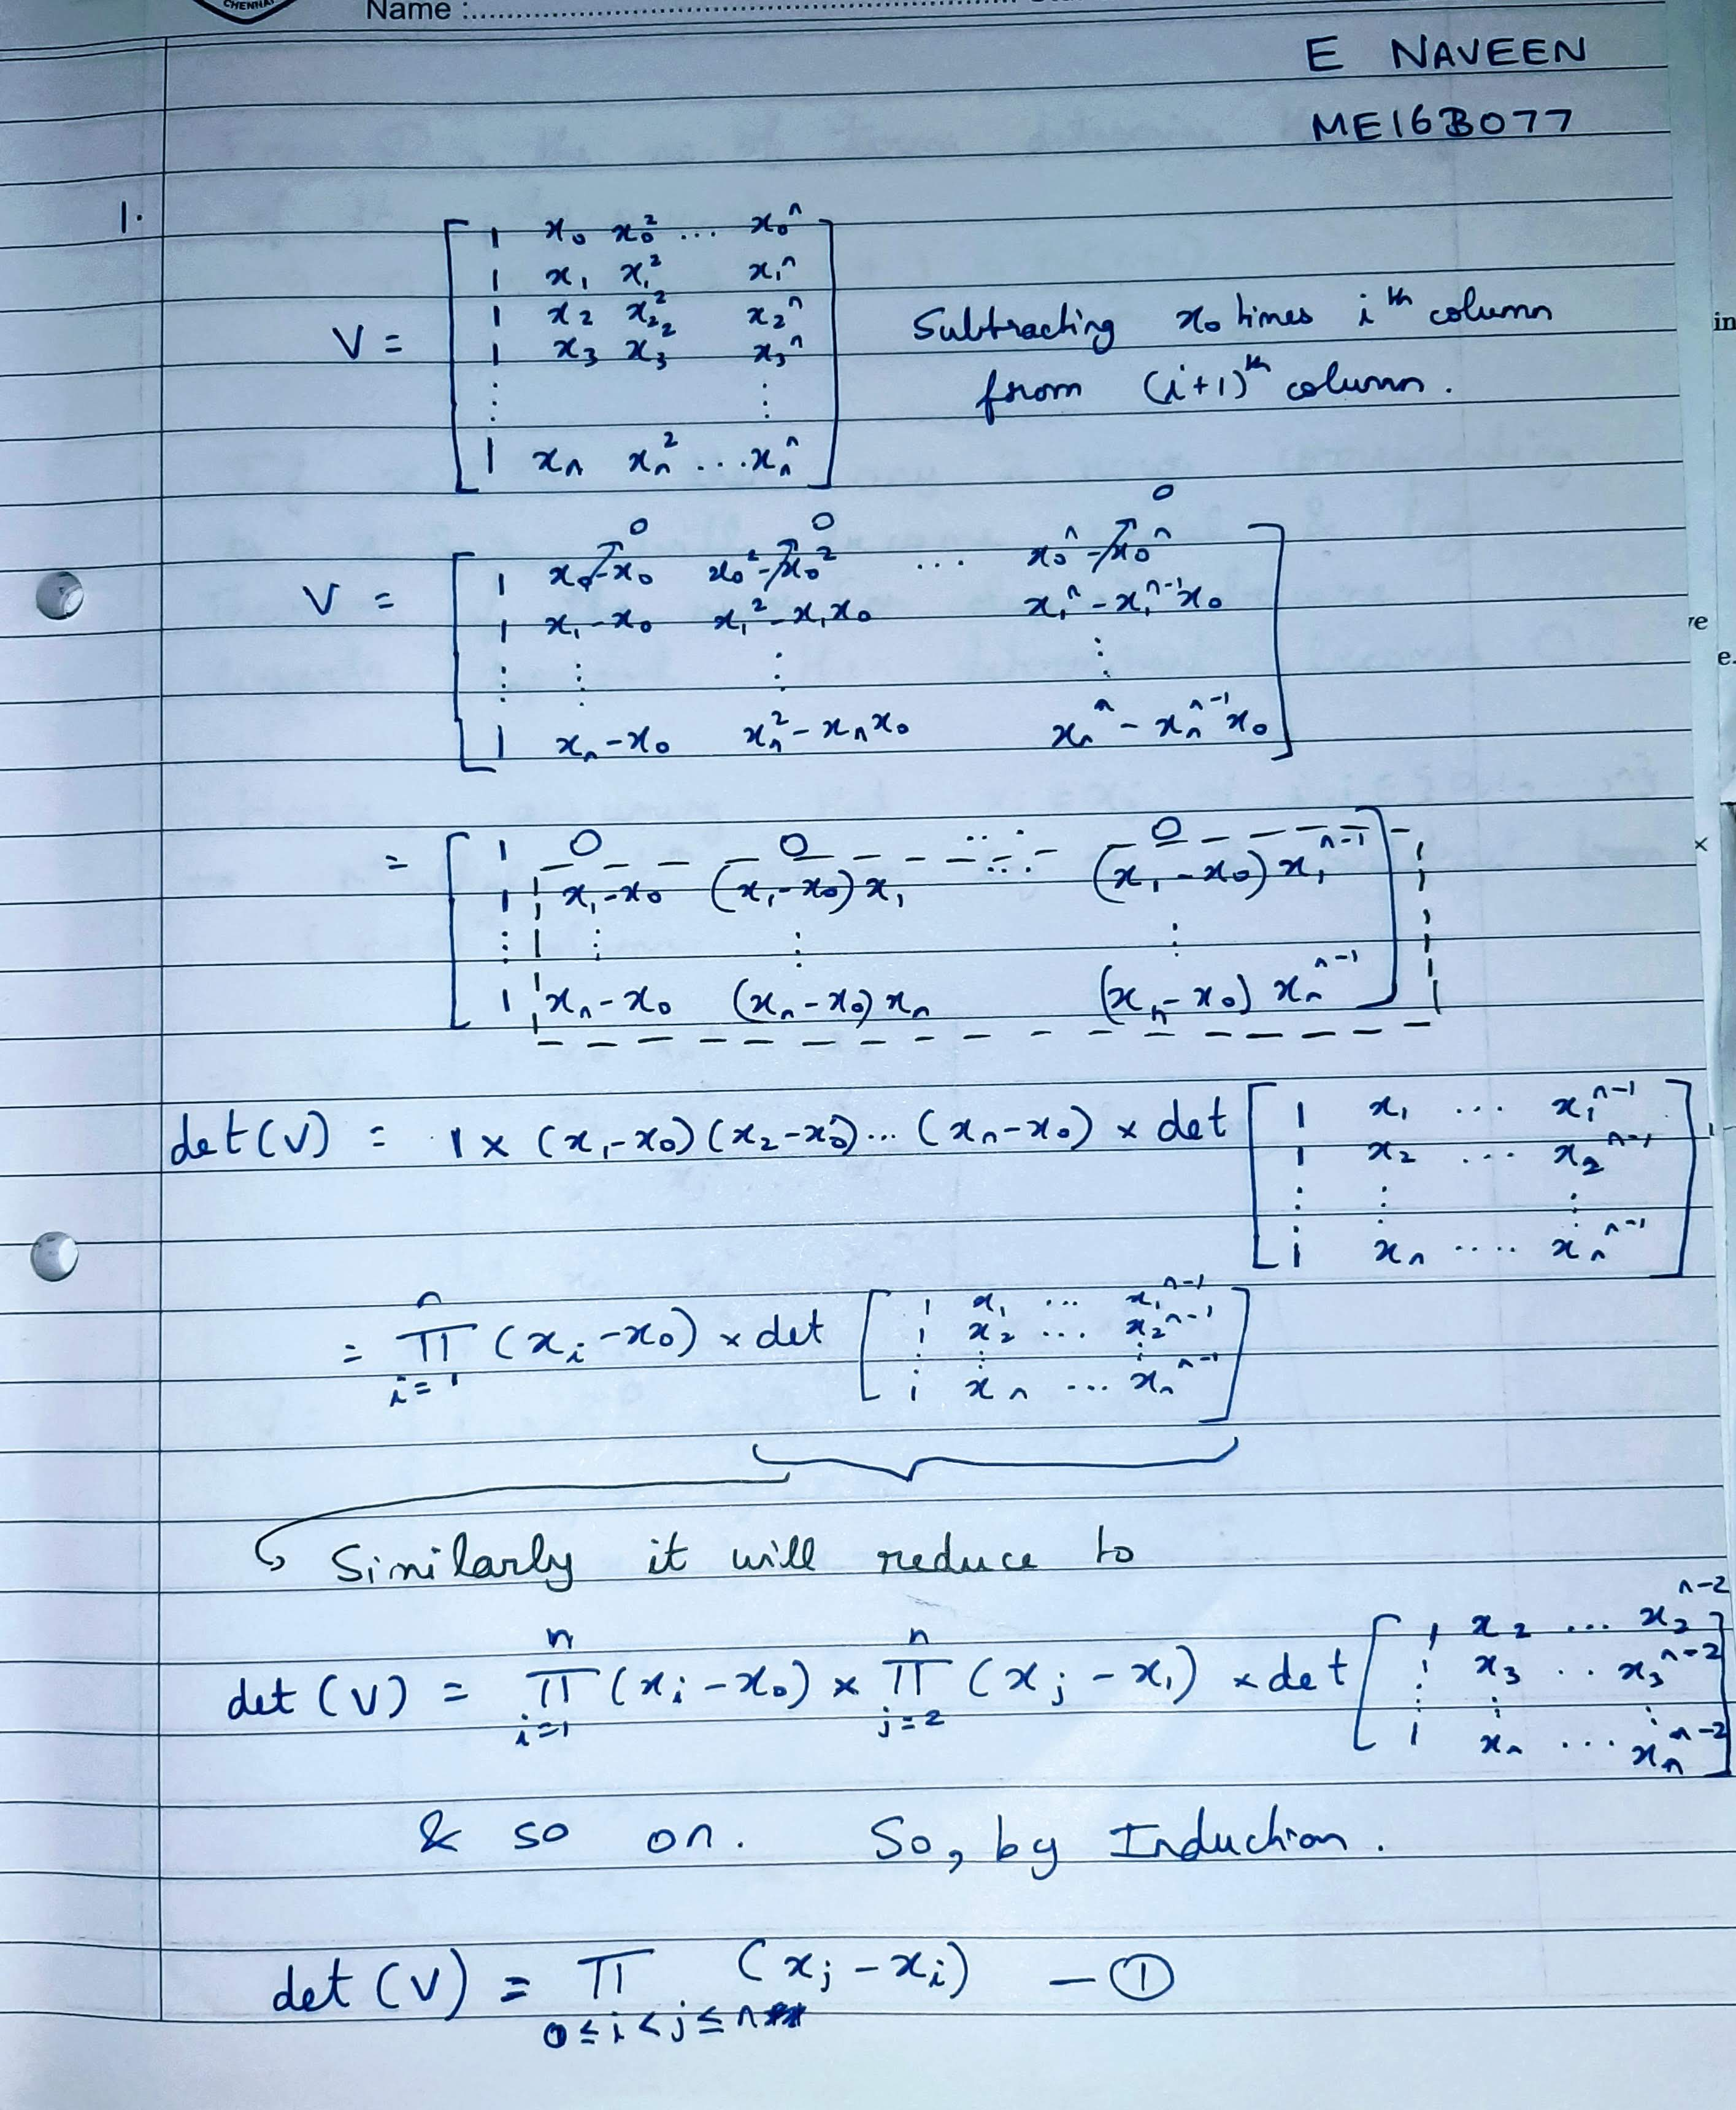
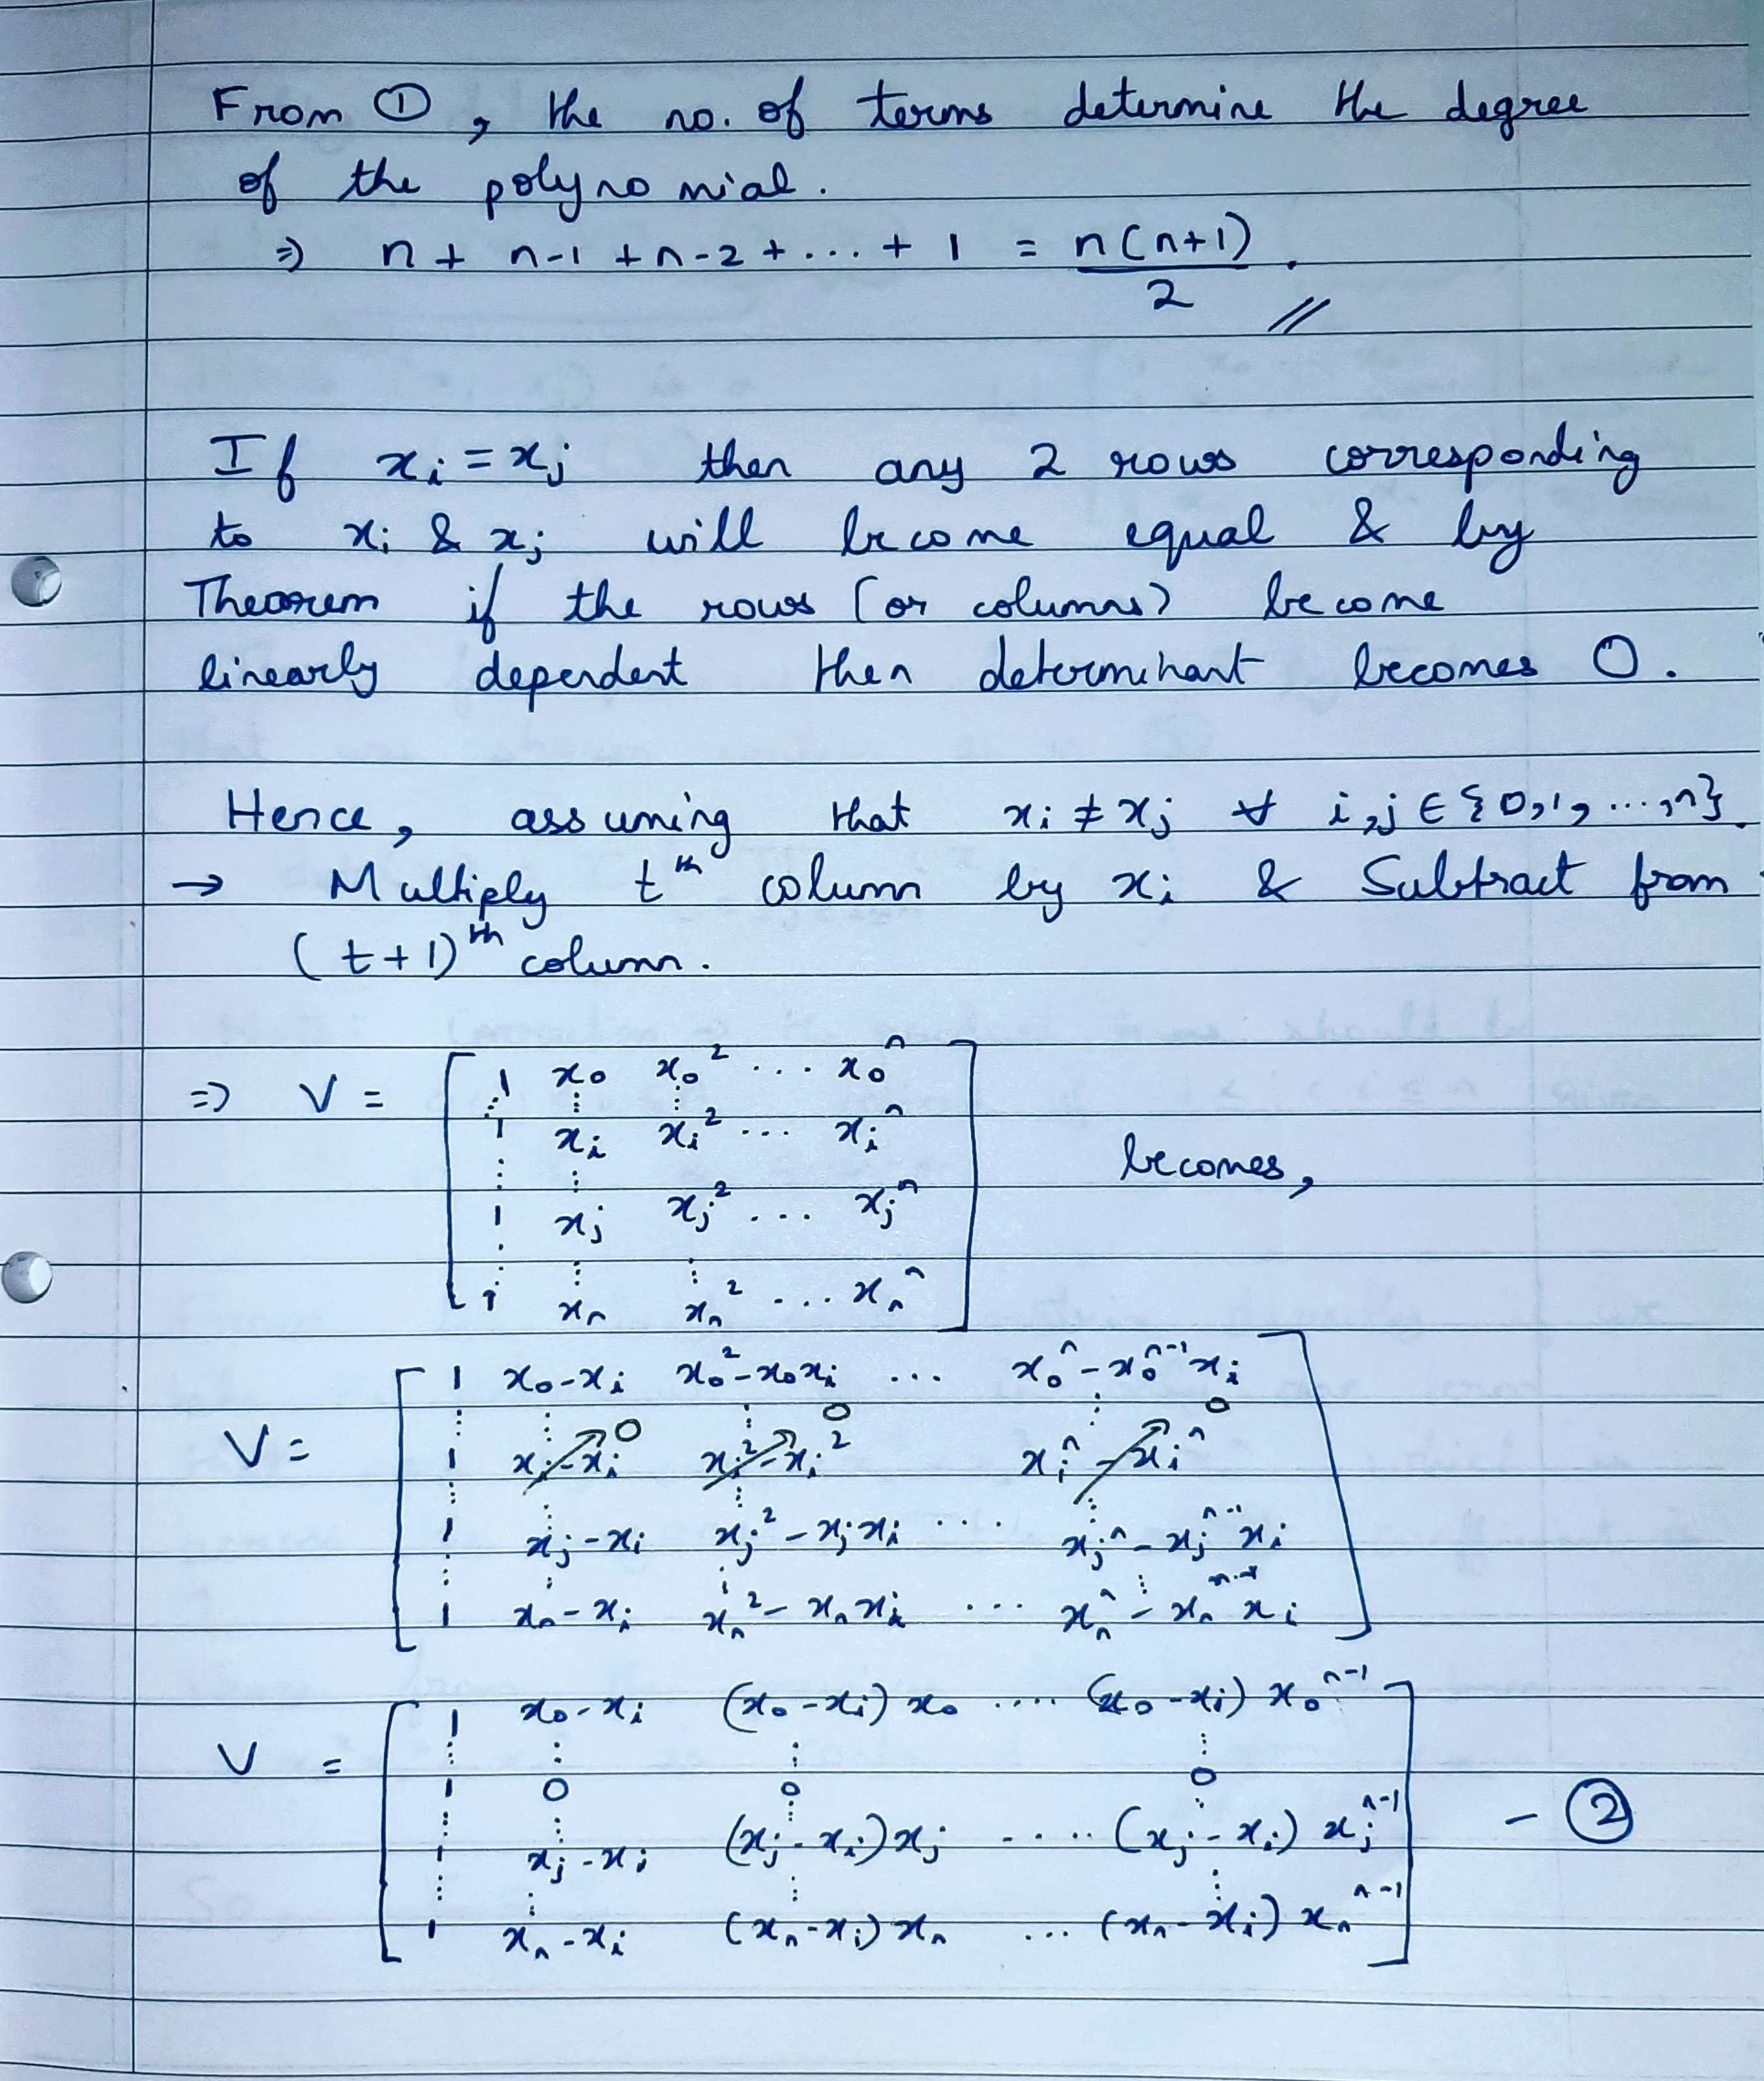
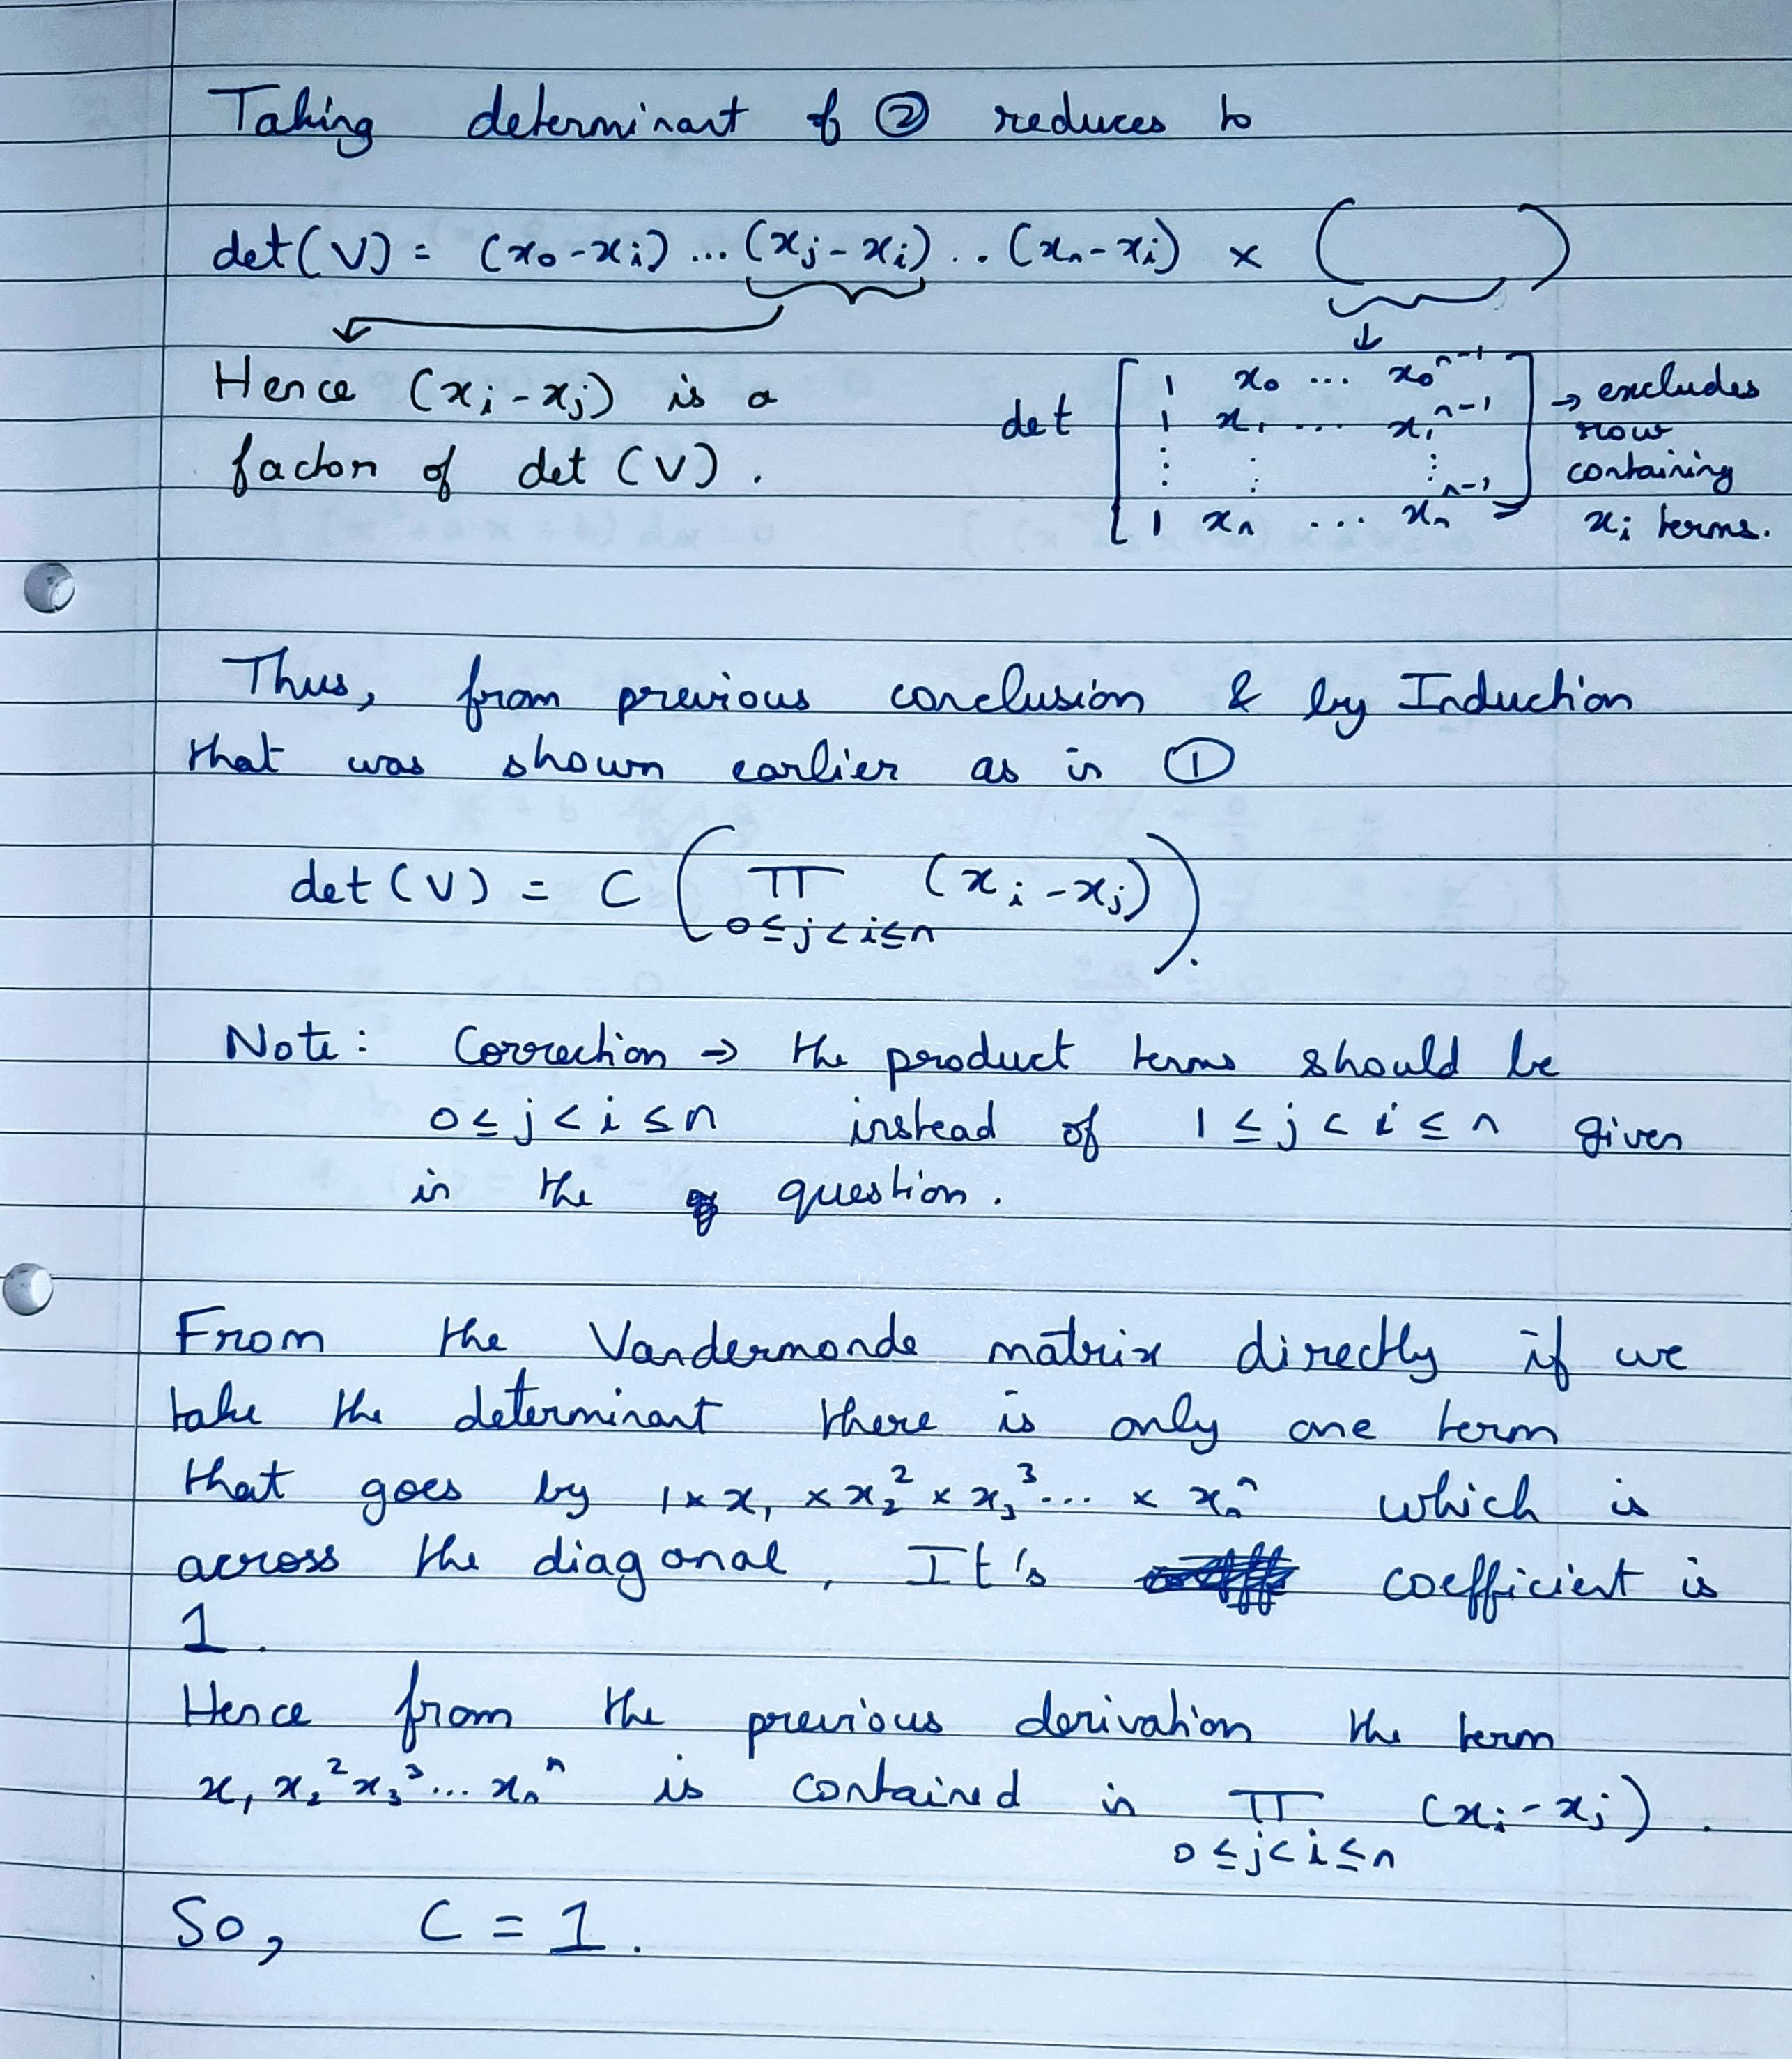

# Q2.
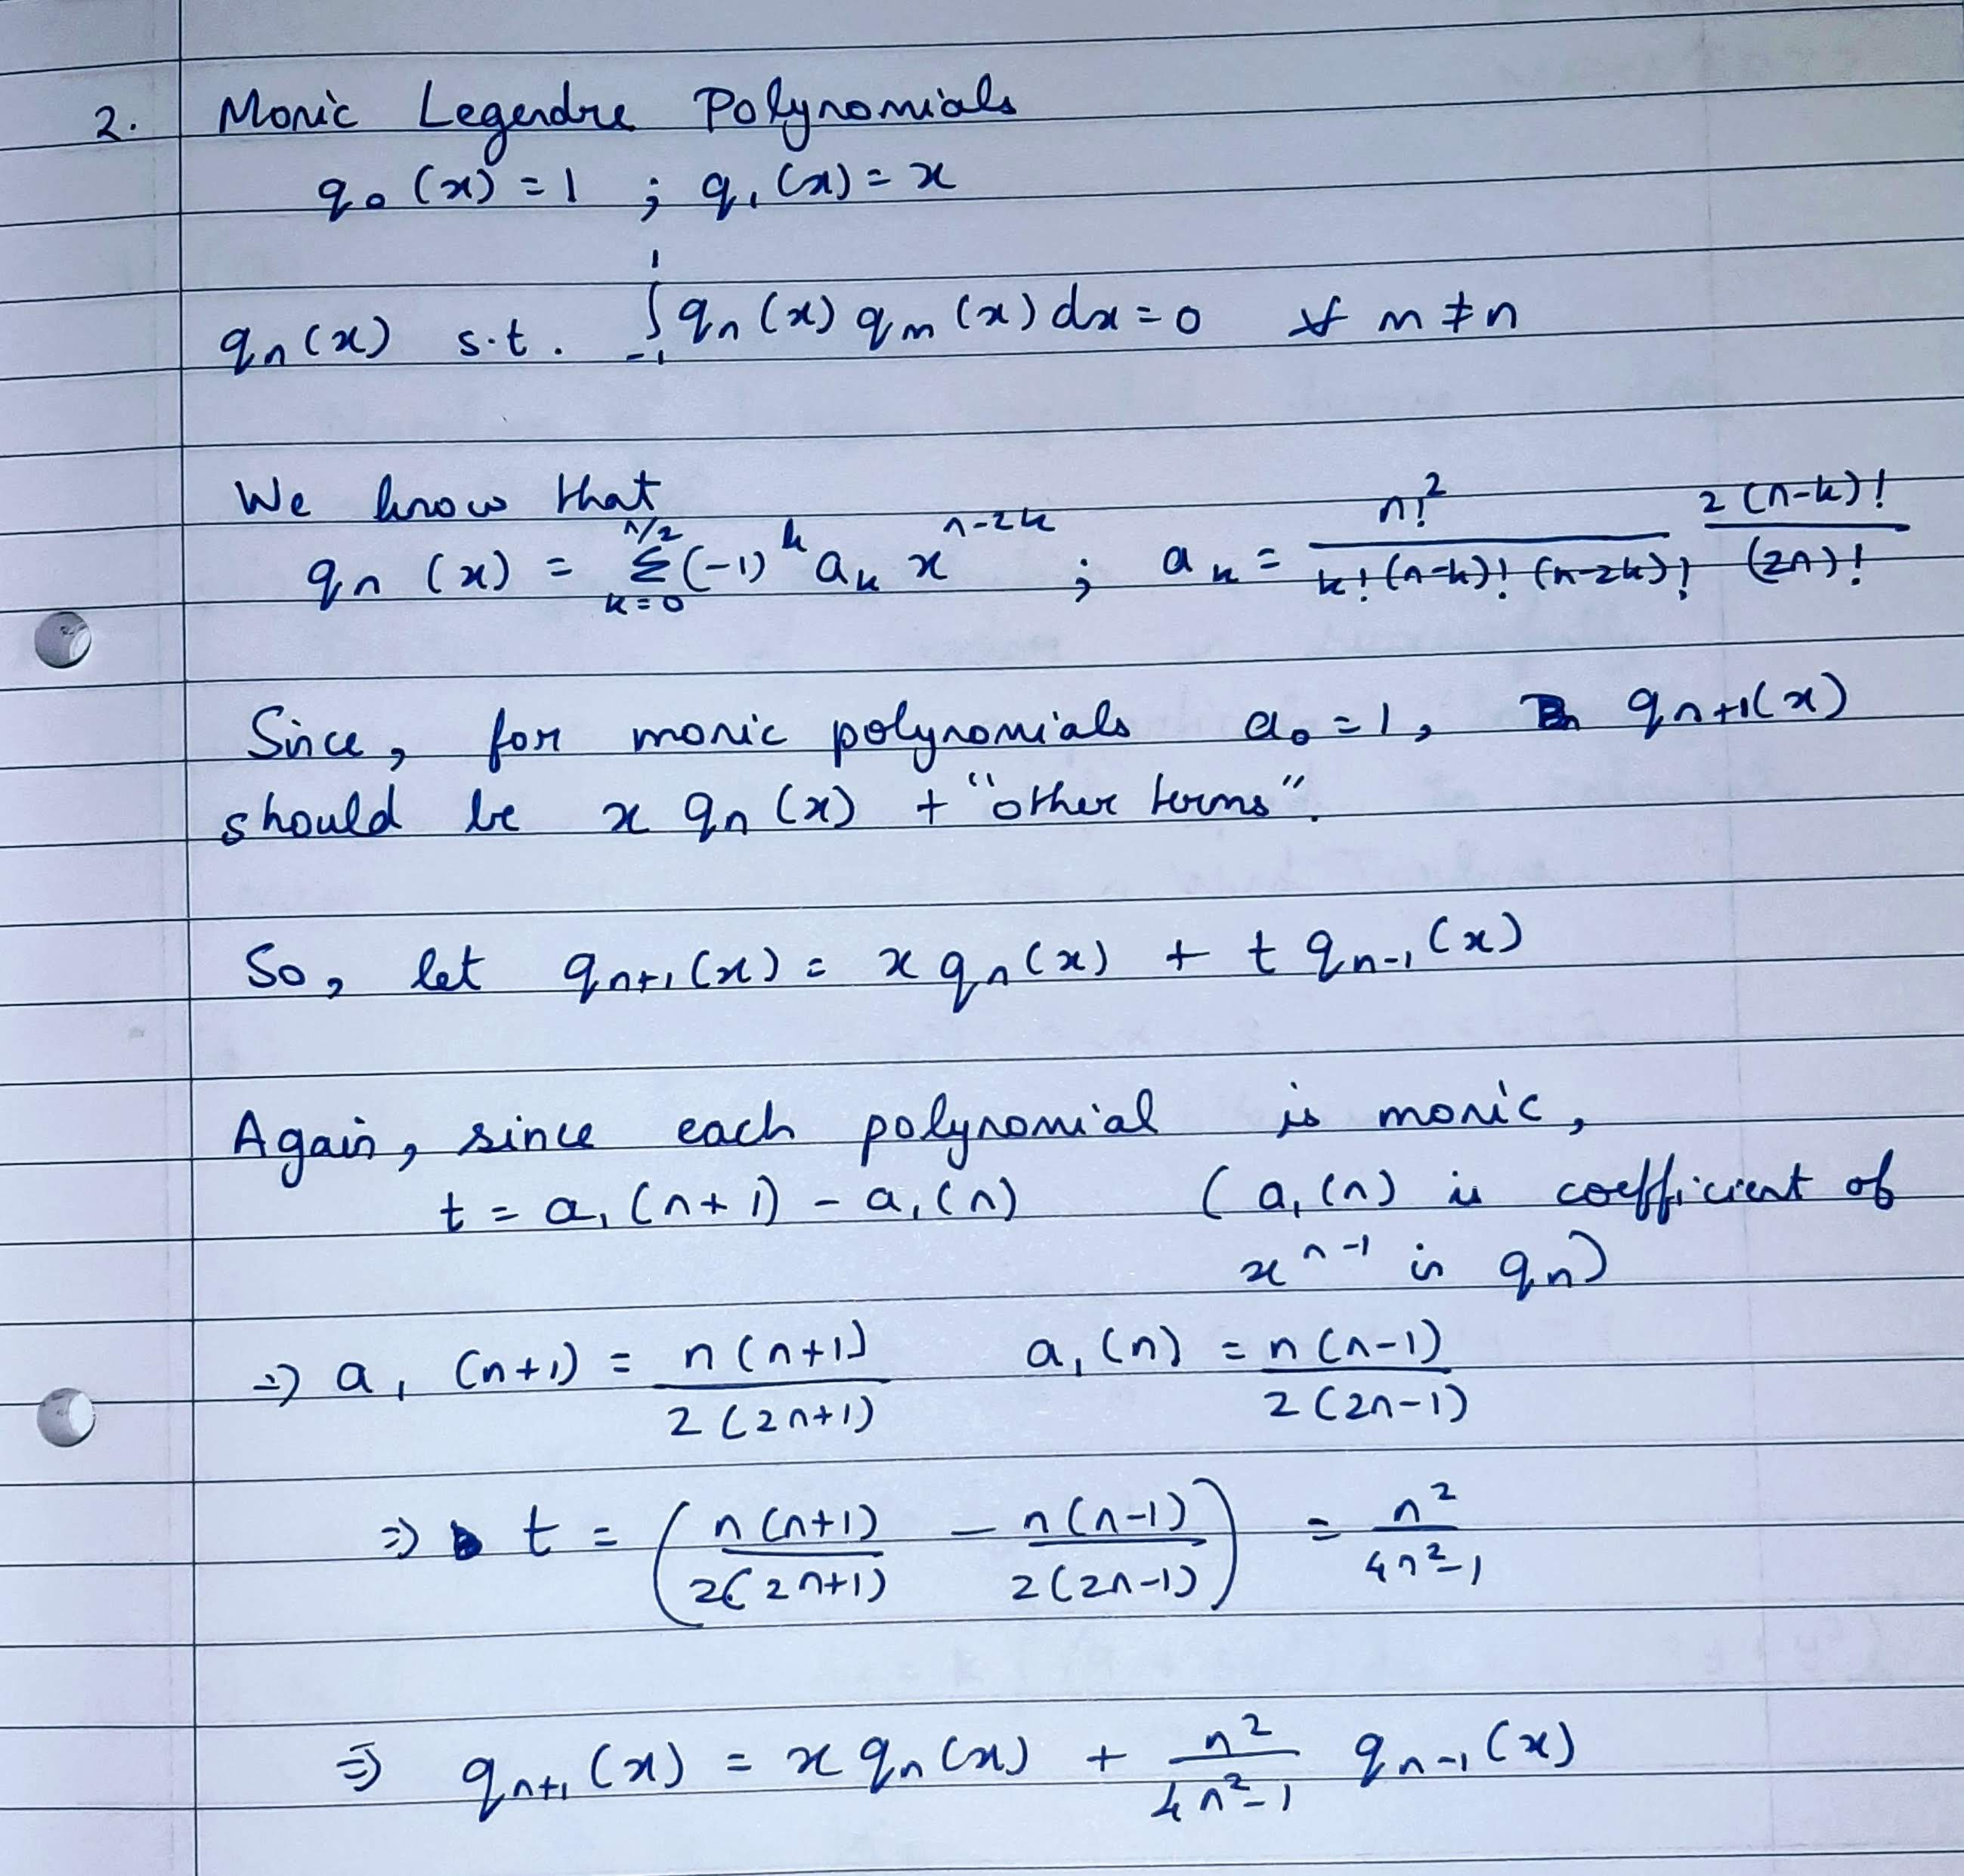

# Q3.
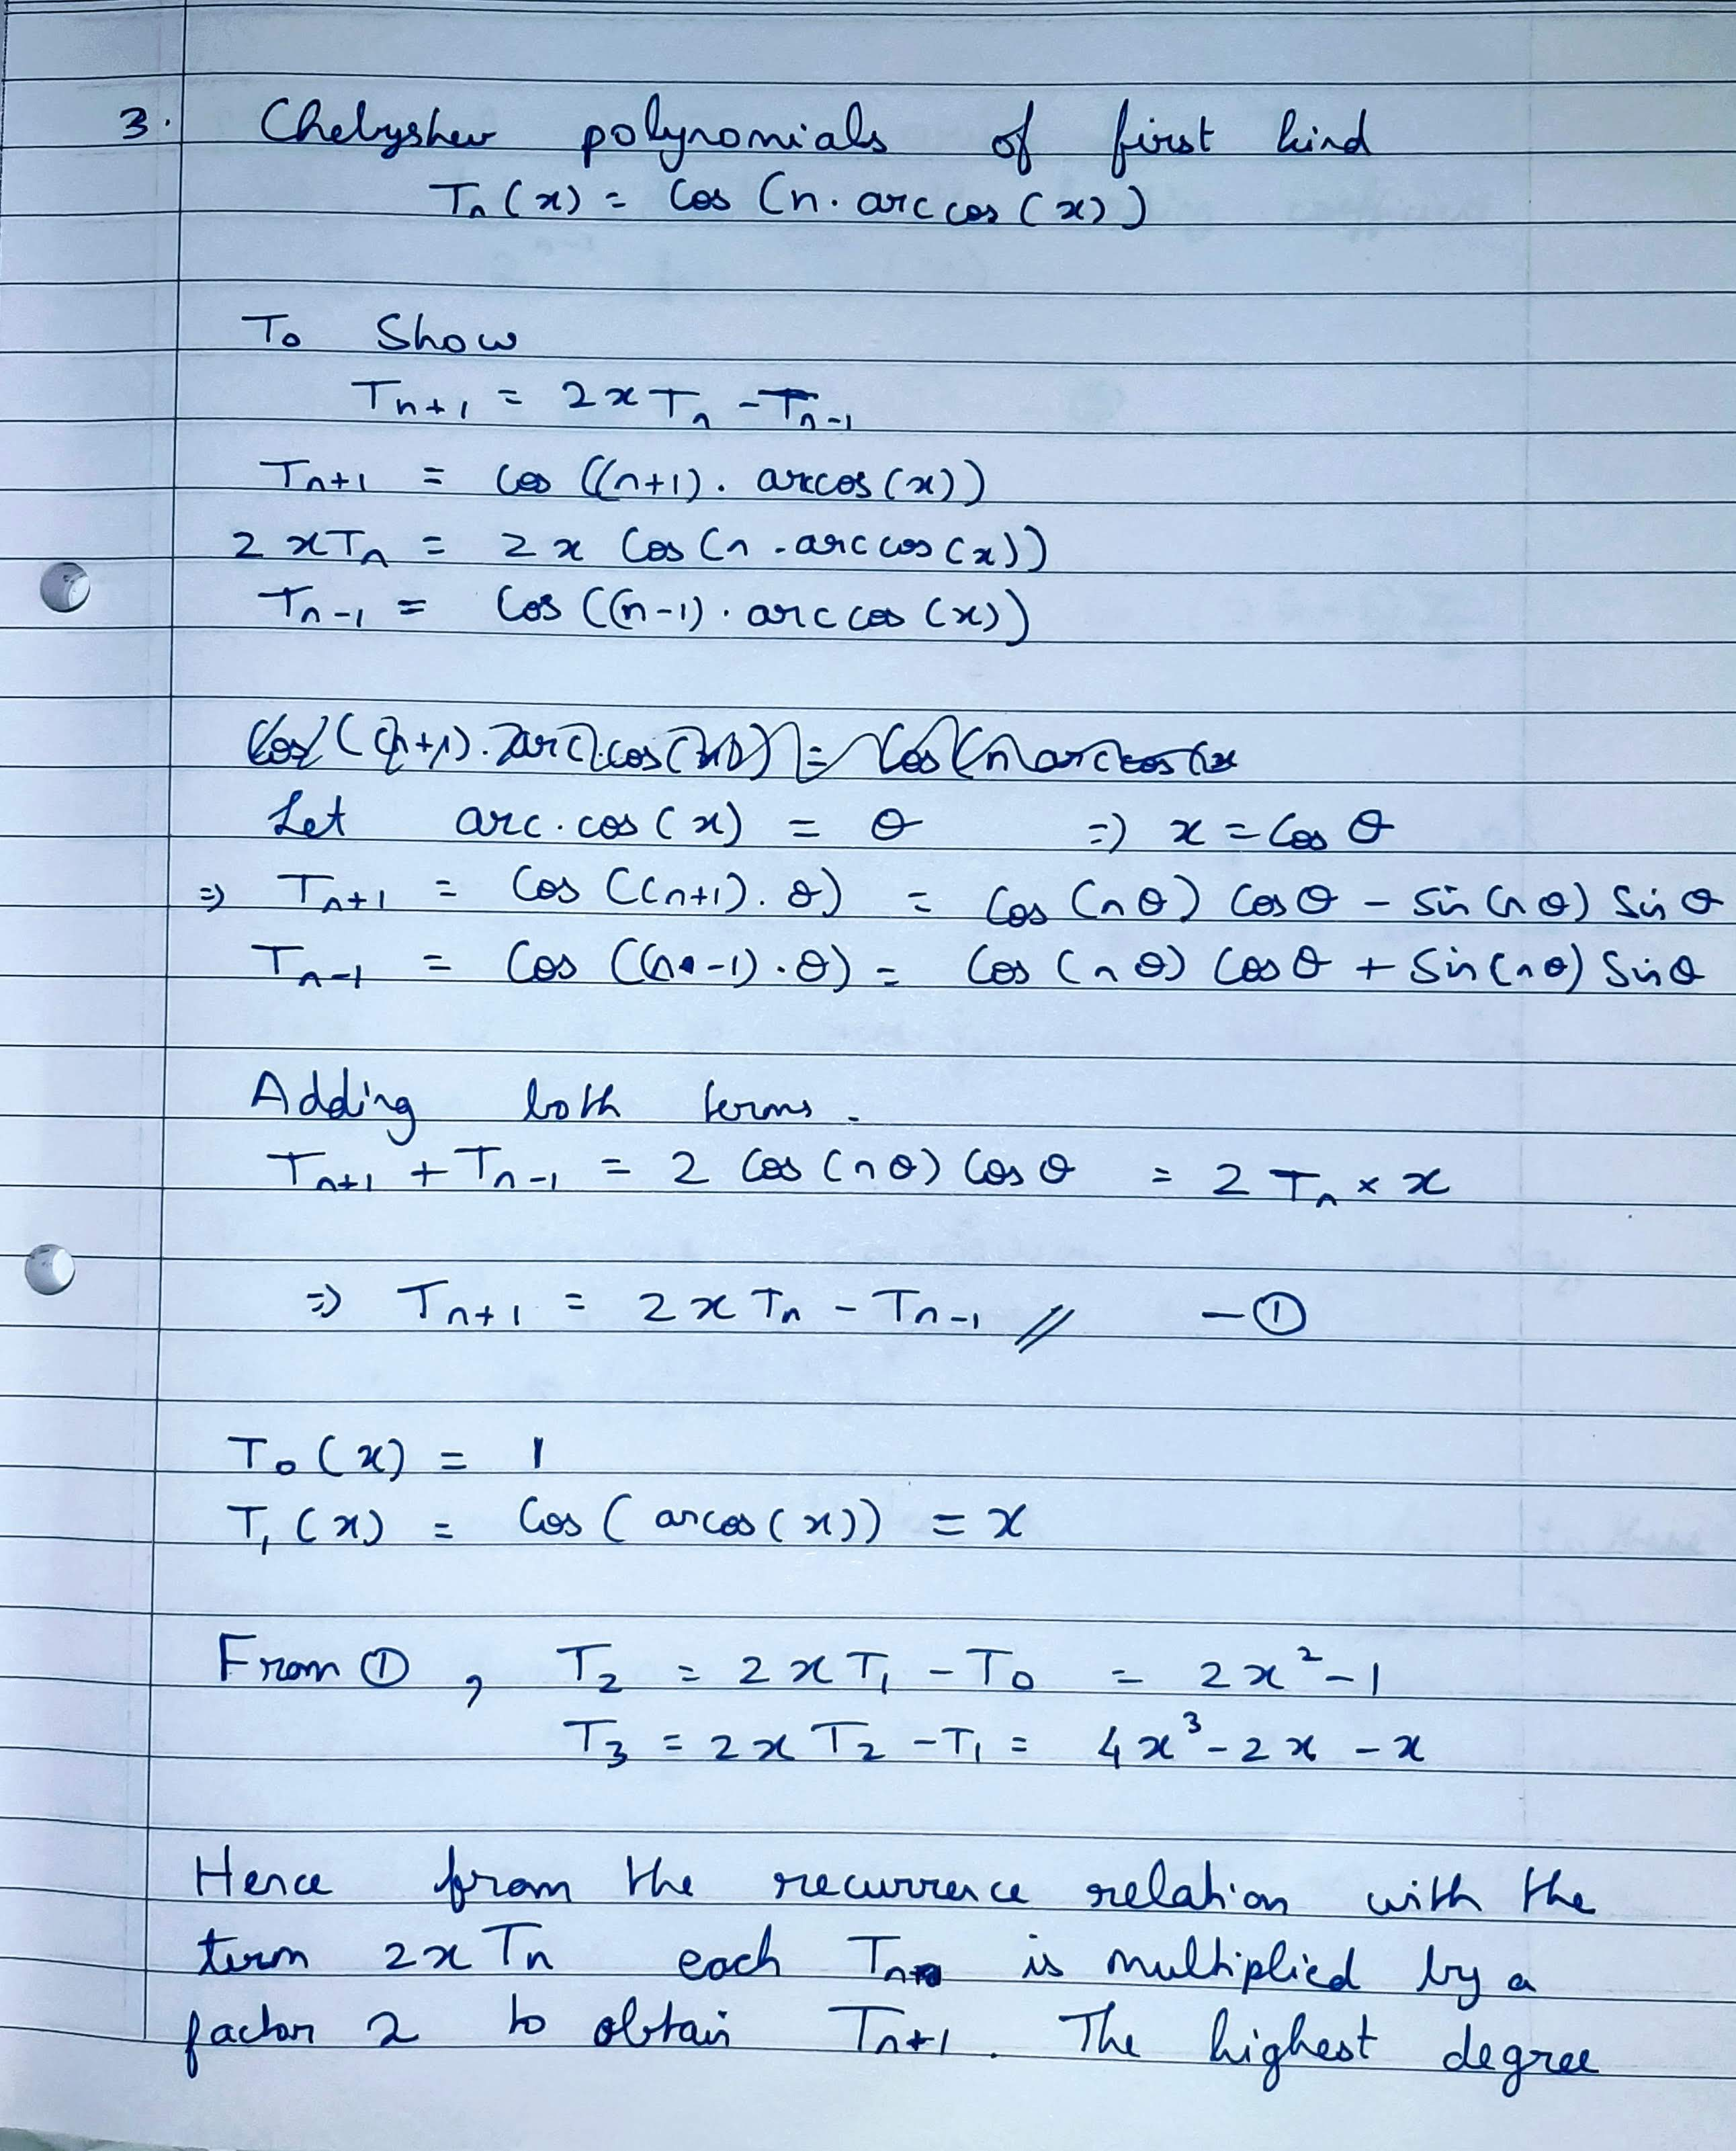
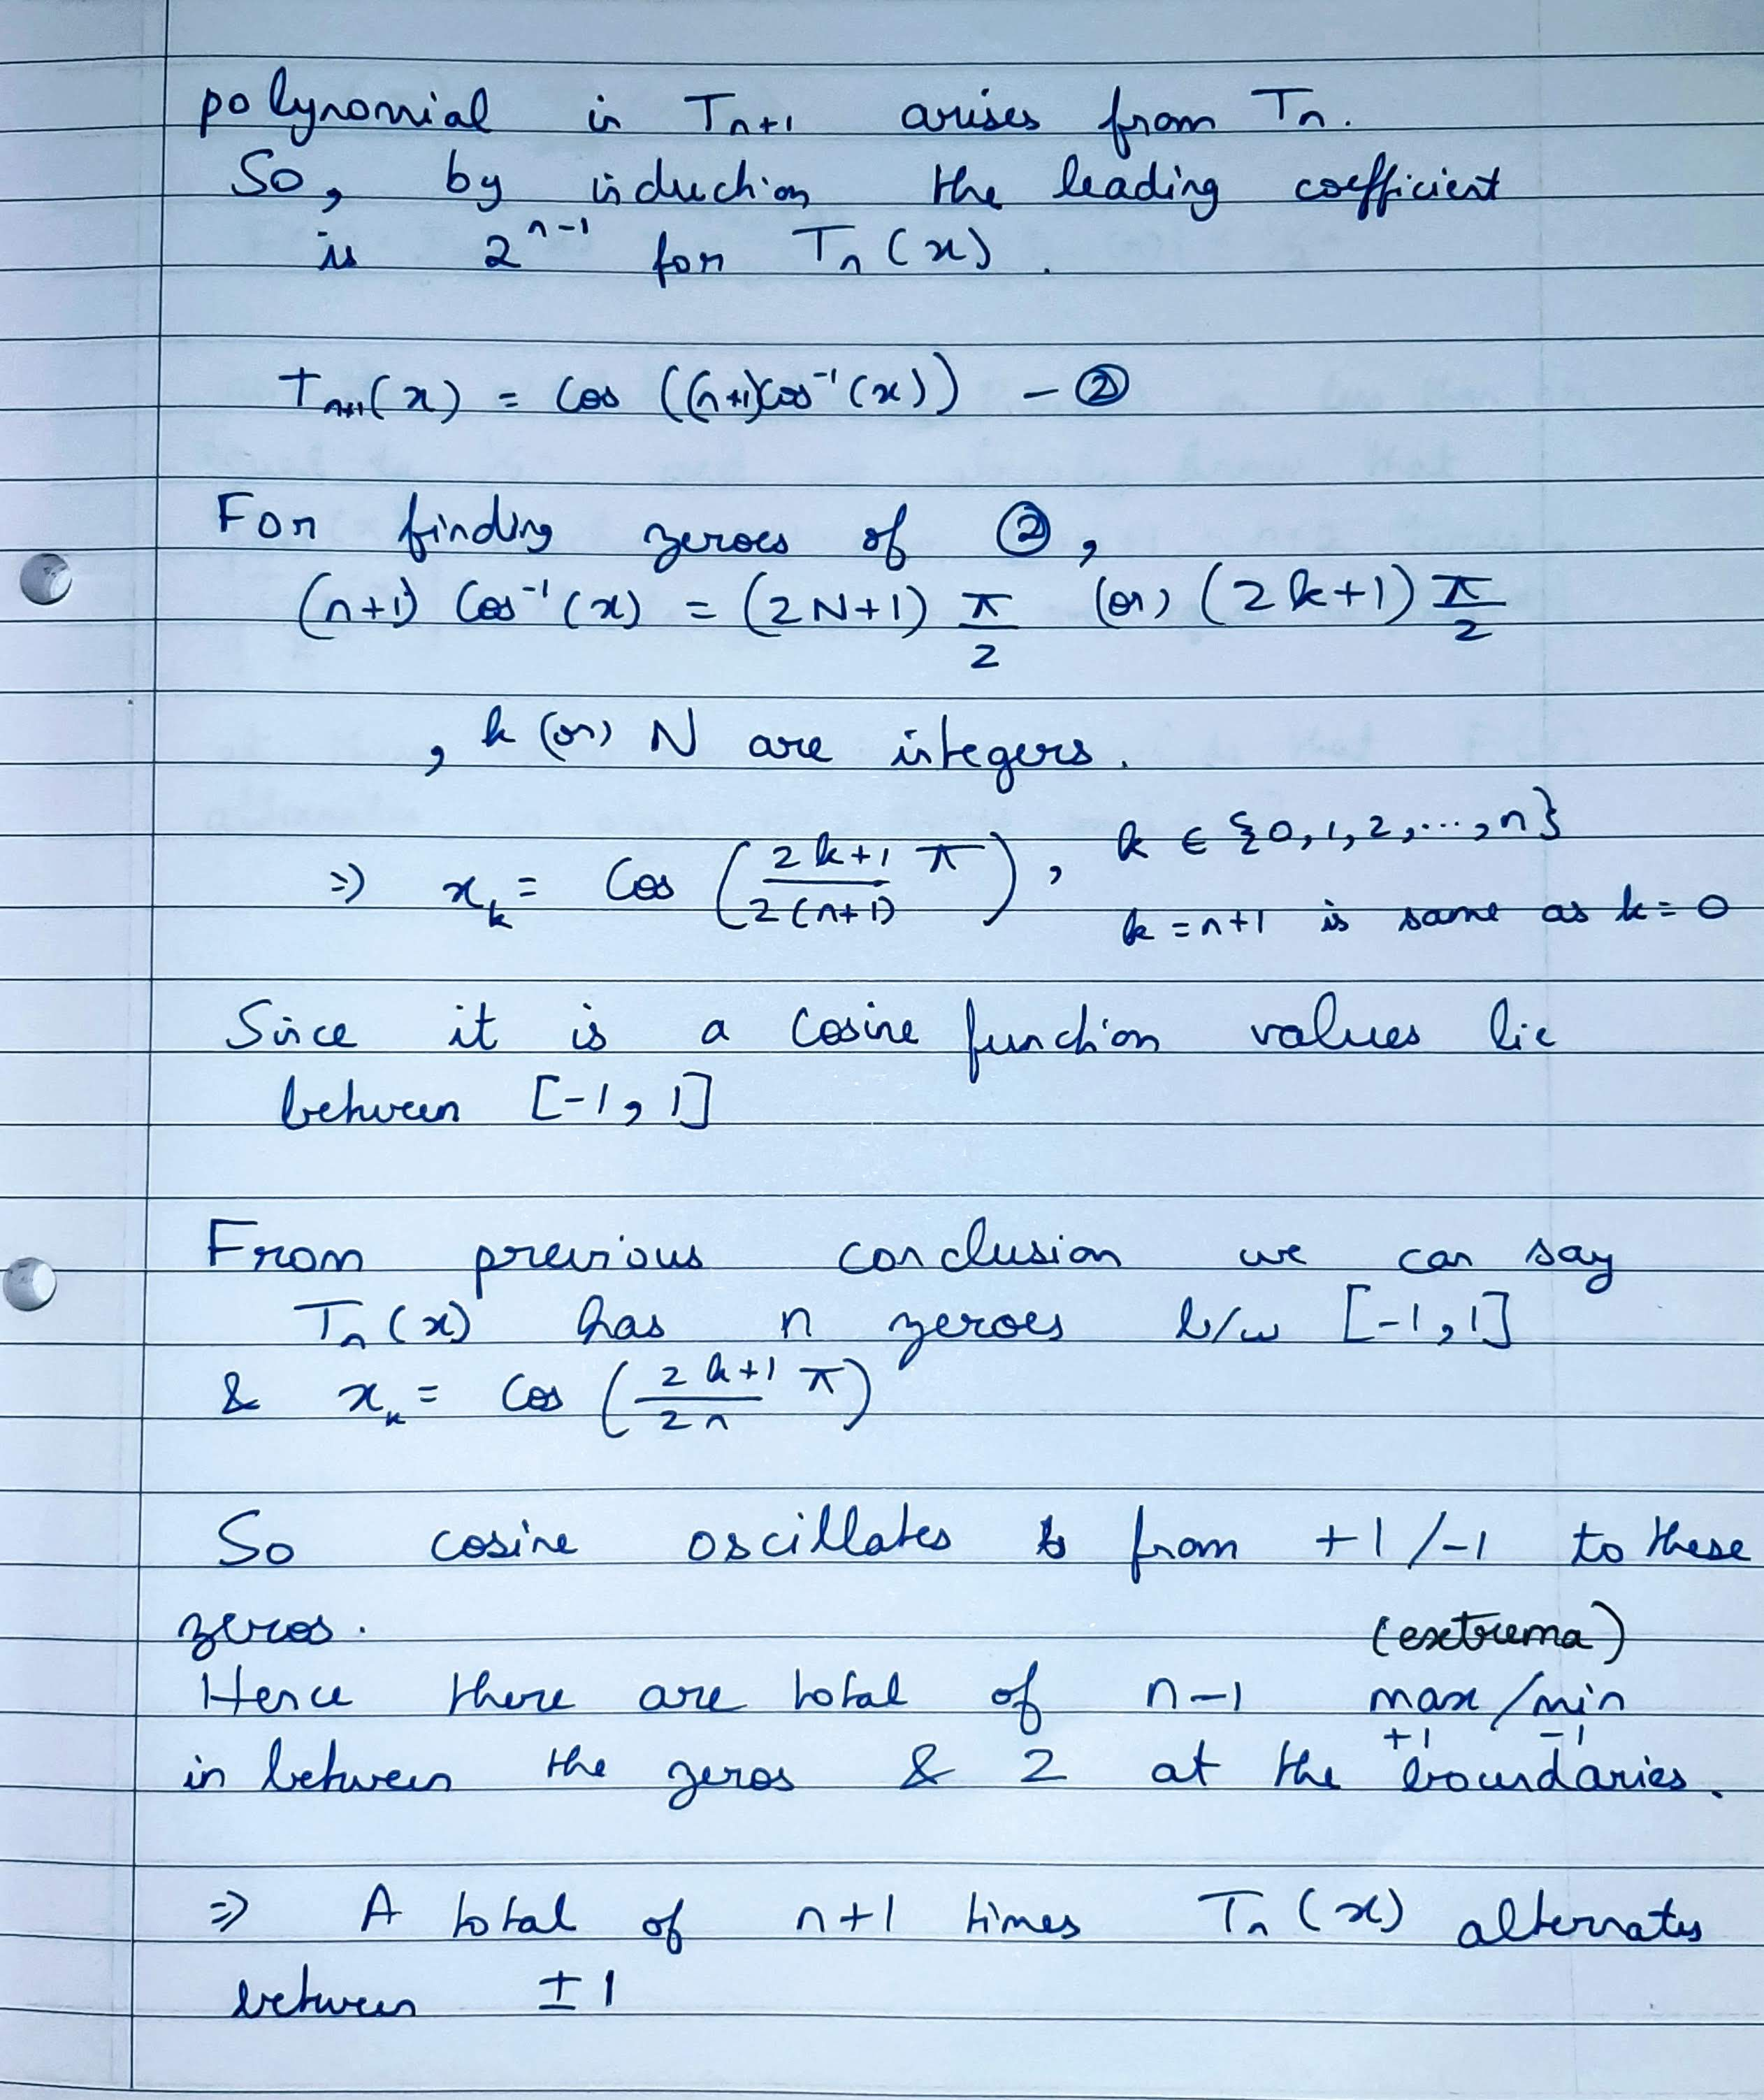
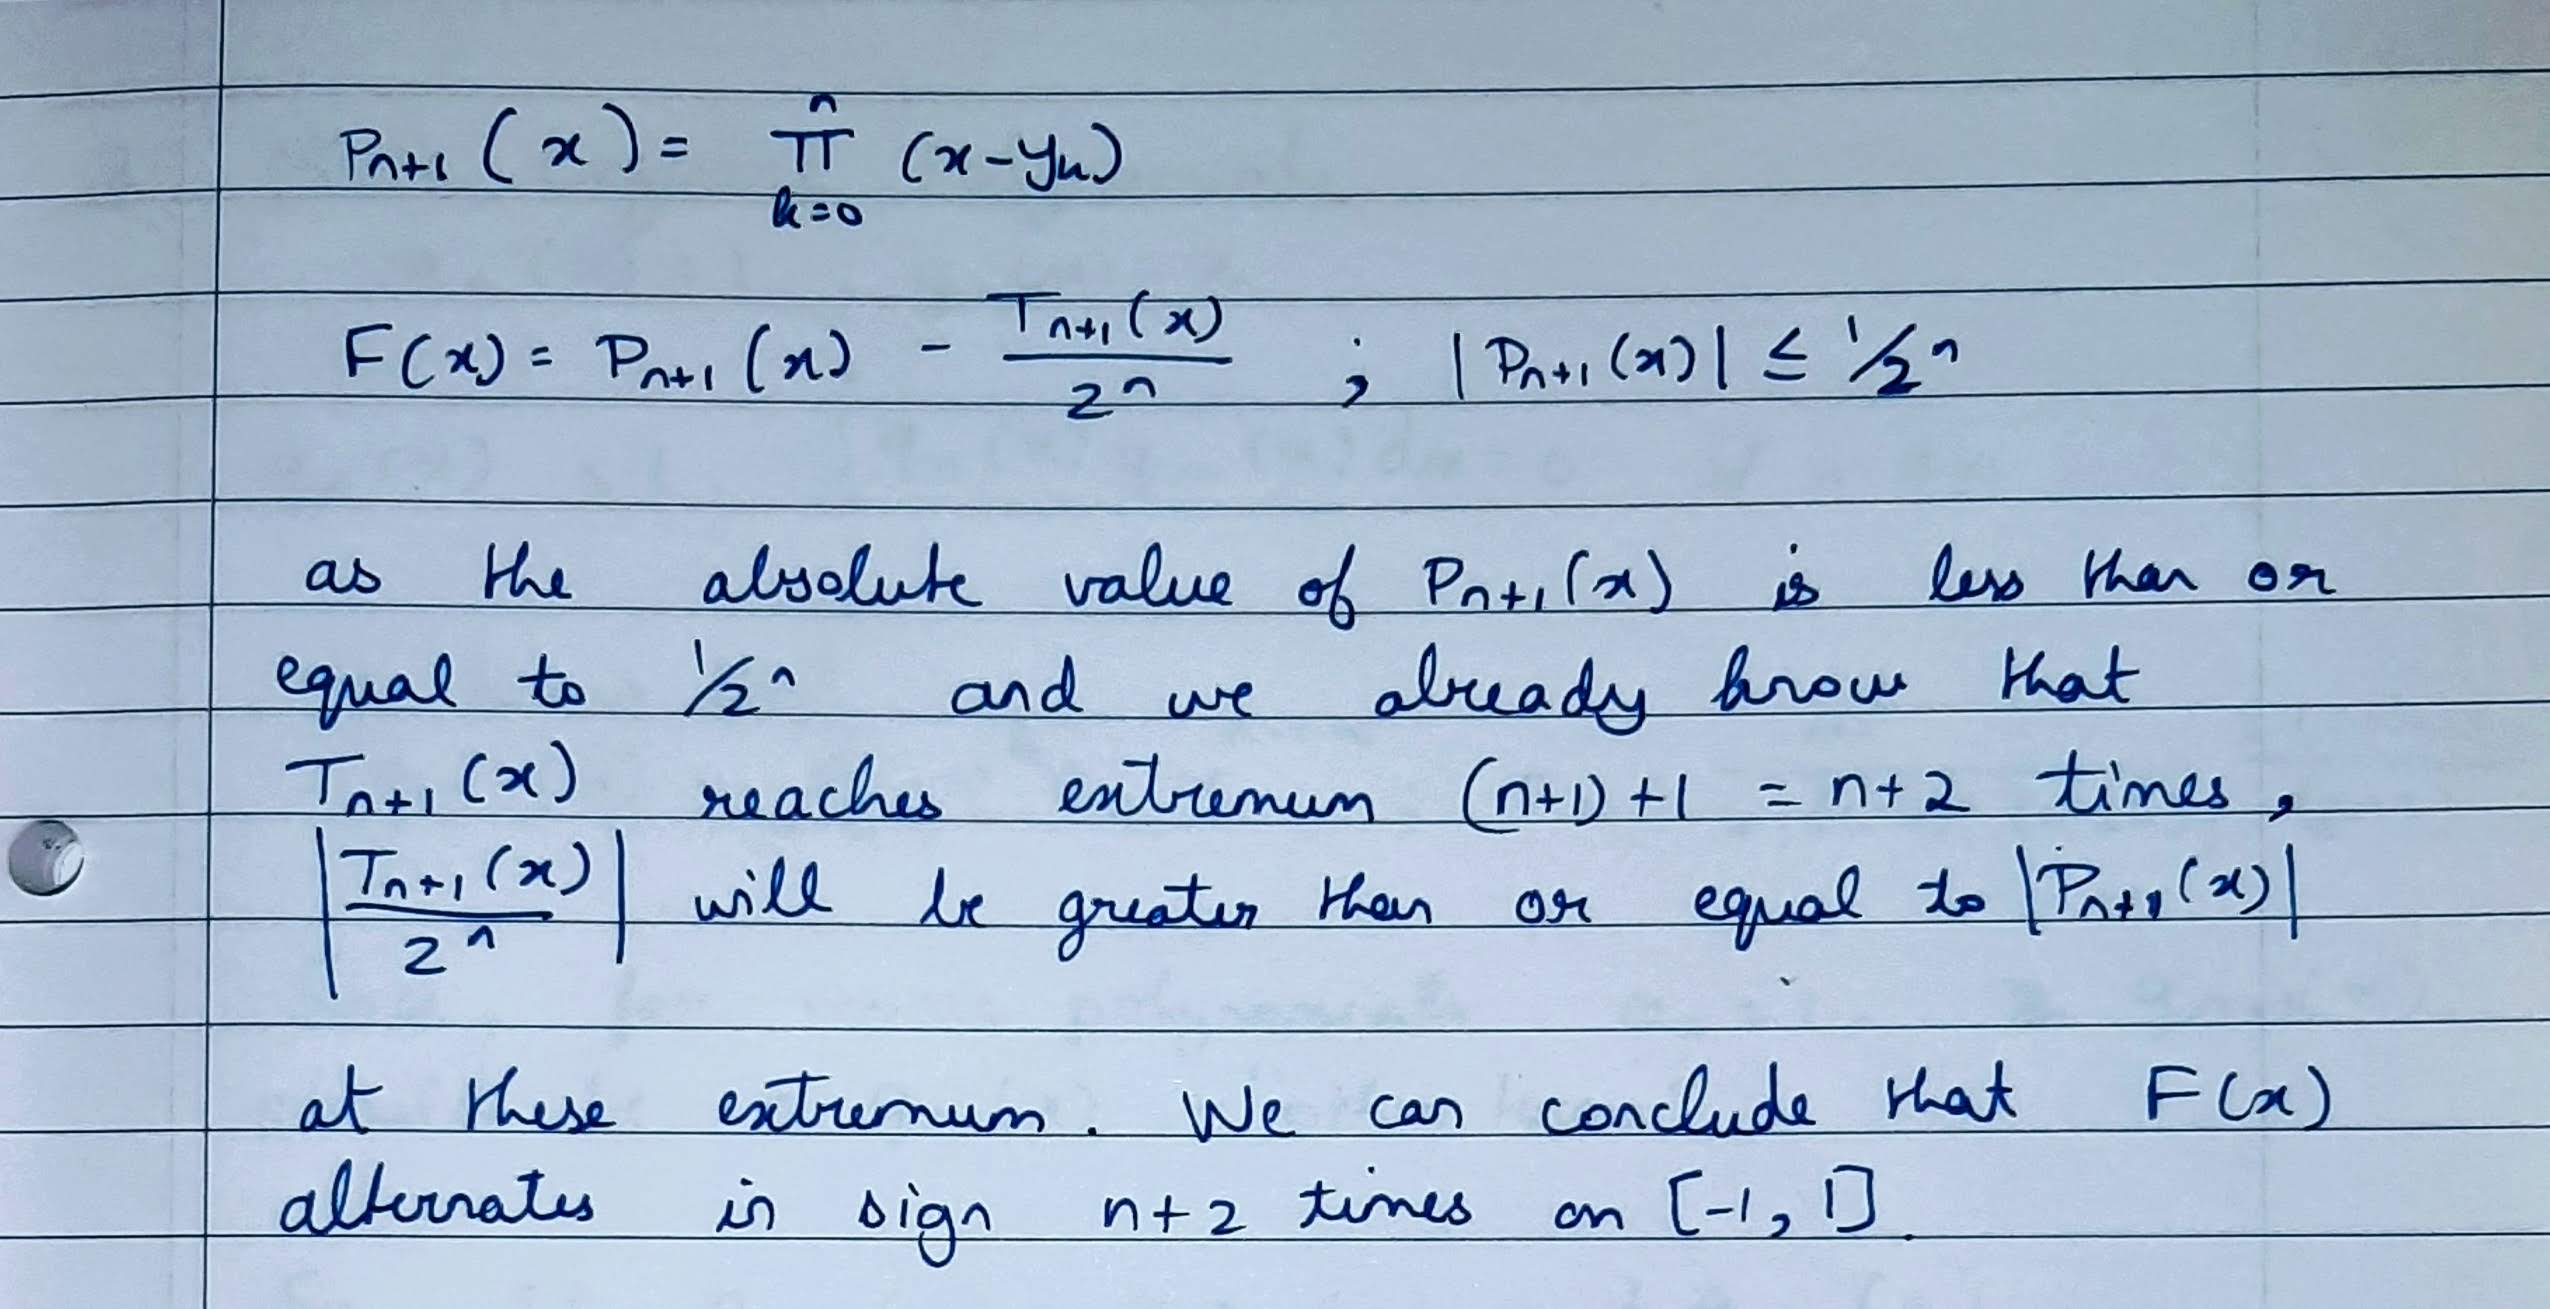

# Q4.

### Finding Condition Number of Vandermonde Matrices

In [1]:
import numpy as np
from numpy.linalg import cond
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
def Vandermonde_matrix(xnodes):
    return np.array([[xnodes[i]**j for j in range(len(xnodes))] for i in range(len(xnodes))])

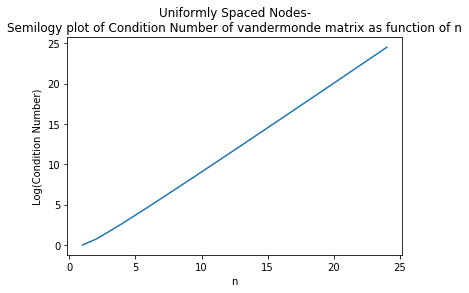

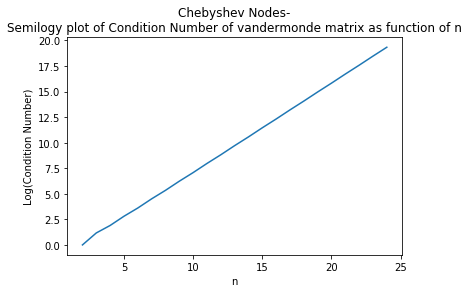

In [3]:
# Uniformly Spaced Nodes

N = 25
cond_no=[]

for n in range(1,N):
    xnodes = np.array([-1+((2*k+1)/n) for k in range(n)])
    cond_no.append(cond(Vandermonde_matrix(xnodes)))
plt.plot([n for n in range(1,N)], np.log(cond_no))
plt.xlabel('n')
plt.ylabel('Log(Condition Number)')
plt.title('Uniformly Spaced Nodes-\nSemilogy plot of Condition Number of vandermonde matrix as function of n')
plt.show()

# Chebyshev Nodes 

N = 25
cond_no=[]

for n in range(2,N):
    xnodes = np.cos(np.arange(0,n)*np.pi/(n-1))
    cond_no.append(cond(Vandermonde_matrix(xnodes)))
plt.plot([n for n in range(2,N)], np.log(cond_no))
plt.xlabel('n')
plt.ylabel('Log(Condition Number)')
plt.title('Chebyshev Nodes-\nSemilogy plot of Condition Number of vandermonde matrix as function of n')
plt.show()

### Obtaining and Plotting the Interpolant

In [4]:
def get_nodes(n,type_node):
    if type_node == 'uniform': return np.array([-1+((2*k+1)/n) for k in range(n)])
    if type_node == 'chebyshev': return np.cos(np.arange(0,n)*np.pi/(n-1))

In [5]:
# Linear System

@interact
def inter(nnodes=(5,100,5),node_type=['chebyshev', 'uniform']):
    xnodes = get_nodes(n=nnodes,type_node=node_type)
    fnodes = 1/(1+25*xnodes**2)

    V = Vandermonde_matrix(xnodes)
    a = np.dot(np.linalg.inv(V),fnodes)

    xplot = np.linspace(-1,1,100)
    f_plot = 1/(1+25*xplot**2)
    f_inter = 0
    for i in range(nnodes):
        f_inter = f_inter + a[i]*xplot**i
    plt.plot(xplot,f_plot,'-')
    plt.plot(xplot,f_inter,'r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear System')
    plt.rcParams["figure.figsize"] = [20,5]
    plt.show()

interactive(children=(IntSlider(value=50, description='nnodes', min=5, step=5), Dropdown(description='node_typ…

In [7]:
# Lagrange polynomials

def Lagrange(xnodes,x,i):
    f = 1
    nnodes = np.size(xnodes)
    for j in range(0,nnodes):
        if j==i:continue
        f = f*(x-xnodes[j])/(xnodes[i]-xnodes[j])
    return f

@interact
def inter(nnodes=(5,100,5),node_type=['chebyshev', 'uniform']):
    xnodes = get_nodes(n=nnodes,type_node=node_type)
    fnodes = 1/(1+25*xnodes**2)

    xplot = np.linspace(-1,1,100)
    f_plot = 1/(1+25*xplot**2)
#     print(f_plot)
    f_inter = 0
    for i in range(0,nnodes):
        f_inter = f_inter + fnodes[i]*Lagrange(xnodes,xplot,i);

    plt.plot(xplot,f_plot,'-')
    plt.plot(xplot,f_inter,'r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Lagrange Polynomials')
    plt.rcParams["figure.figsize"] = [20,5]
    plt.show()

interactive(children=(IntSlider(value=50, description='nnodes', min=5, step=5), Dropdown(description='node_typ…

### Interpolant
The Linear system method although seems to be working fine for smaller values of number of nodes becomes highly inaccurate for larger values. Whereas the Lagrange Polynomials method provides a consistent approximation even for larger values of "n". 

### Cost of Interpolation
The cost of evaluating the interpolant at a point x as a function of n is O(n^2) for Lagrange method.
The same is O(n) for when solving using linear System. But for arriving at the coefficients of the polynomial equation it would cost O(n^3).

### Preferred Method of Polynomial Approximation
Upon varying the number of nodes "n" it was found that the method of solving Linear System became inaccurate for large values of "n". Whereas using the method of Lagrange Polynomials ensured that the interpolant was close to actual values even for large number of nodes "n". 
Chebyshev nodes were used to compare as it is already known that upon using Uniform nodes regardless of the method there were huge errors near the boundaries.

### Finding Decay in Maximum relative Error as a function of "n"

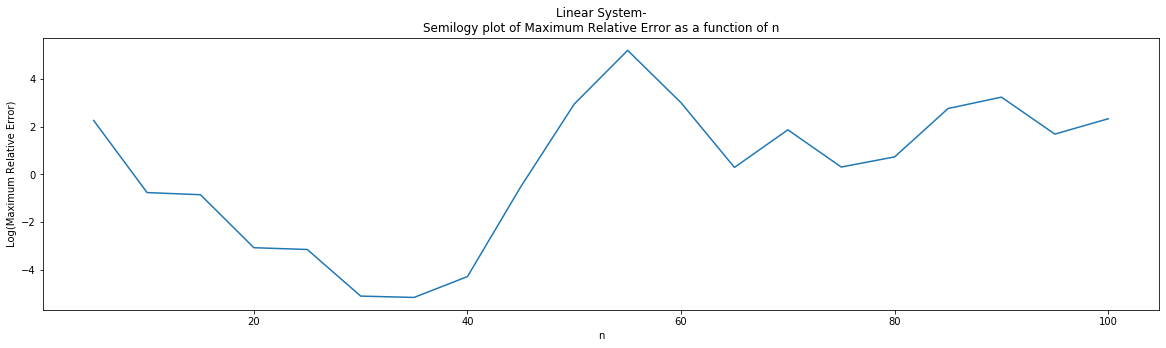

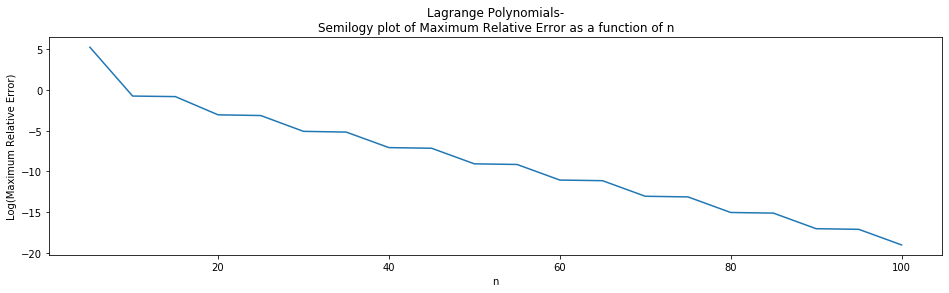

In [8]:
# Maximum Error using Linear System

def get_nodes(n,type_node):
    if type_node == 'uniform': return np.array([-1+((2*k+1)/n) for k in range(n)])
    if type_node == 'chebyshev': return np.cos(np.arange(0,n)*np.pi/(n-1))

# Linear System
nnodes_list = [i*5 for i in range(1,21)]
error = []

for nnodes in nnodes_list:
    xnodes = get_nodes(n=nnodes,type_node='chebyshev')
    fnodes = 1/(1+25*xnodes**2)

    V = Vandermonde_matrix(xnodes)
    a = np.dot(np.linalg.inv(V),fnodes)

    xplot = np.linspace(-1,1,100)
    f_plot = 1/(1+25*xplot**2)
    f_inter = 0
    for i in range(nnodes):
        f_inter = f_inter + a[i]*xplot**i
    error.append(max(np.abs((f_inter - f_plot)/f_inter)))
    
plt.plot(nnodes_list,np.log(error),'-');
plt.xlabel('n')
plt.ylabel('Log(Maximum Relative Error)')
plt.title('Linear System-\nSemilogy plot of Maximum Relative Error as a function of n')
plt.rcParams["figure.figsize"] = [16,4];
plt.show()

# Maximum Error using Lagrange polynomials

def Lagrange(xnodes,x,i):
    f = 1
    nnodes = np.size(xnodes)
    for j in range(0,nnodes):
        if j==i:continue
        f = f*(x-xnodes[j])/(xnodes[i]-xnodes[j])
    return f

nnodes_list = [i*5 for i in range(1,21)]
error = []

for nnodes in nnodes_list:
    xnodes = get_nodes(n=nnodes,type_node='chebyshev')
    fnodes = 1/(1+25*xnodes**2)

    xplot = np.linspace(-1,1,1000)
    f_plot = 1/(1+25*xplot**2)
    f_inter = 0
    for i in range(0,nnodes):
        f_inter = f_inter + fnodes[i]*Lagrange(xnodes,xplot,i);
    error.append(max(np.abs((f_inter - f_plot)/f_inter)))
    
    
plt.plot(nnodes_list,np.log(error),'-');
plt.xlabel('n')
plt.ylabel('Log(Maximum Relative Error)')
plt.title('Lagrange Polynomials-\nSemilogy plot of Maximum Relative Error as a function of n')
plt.rcParams["figure.figsize"] = [16,4];
plt.show()

# Q5.

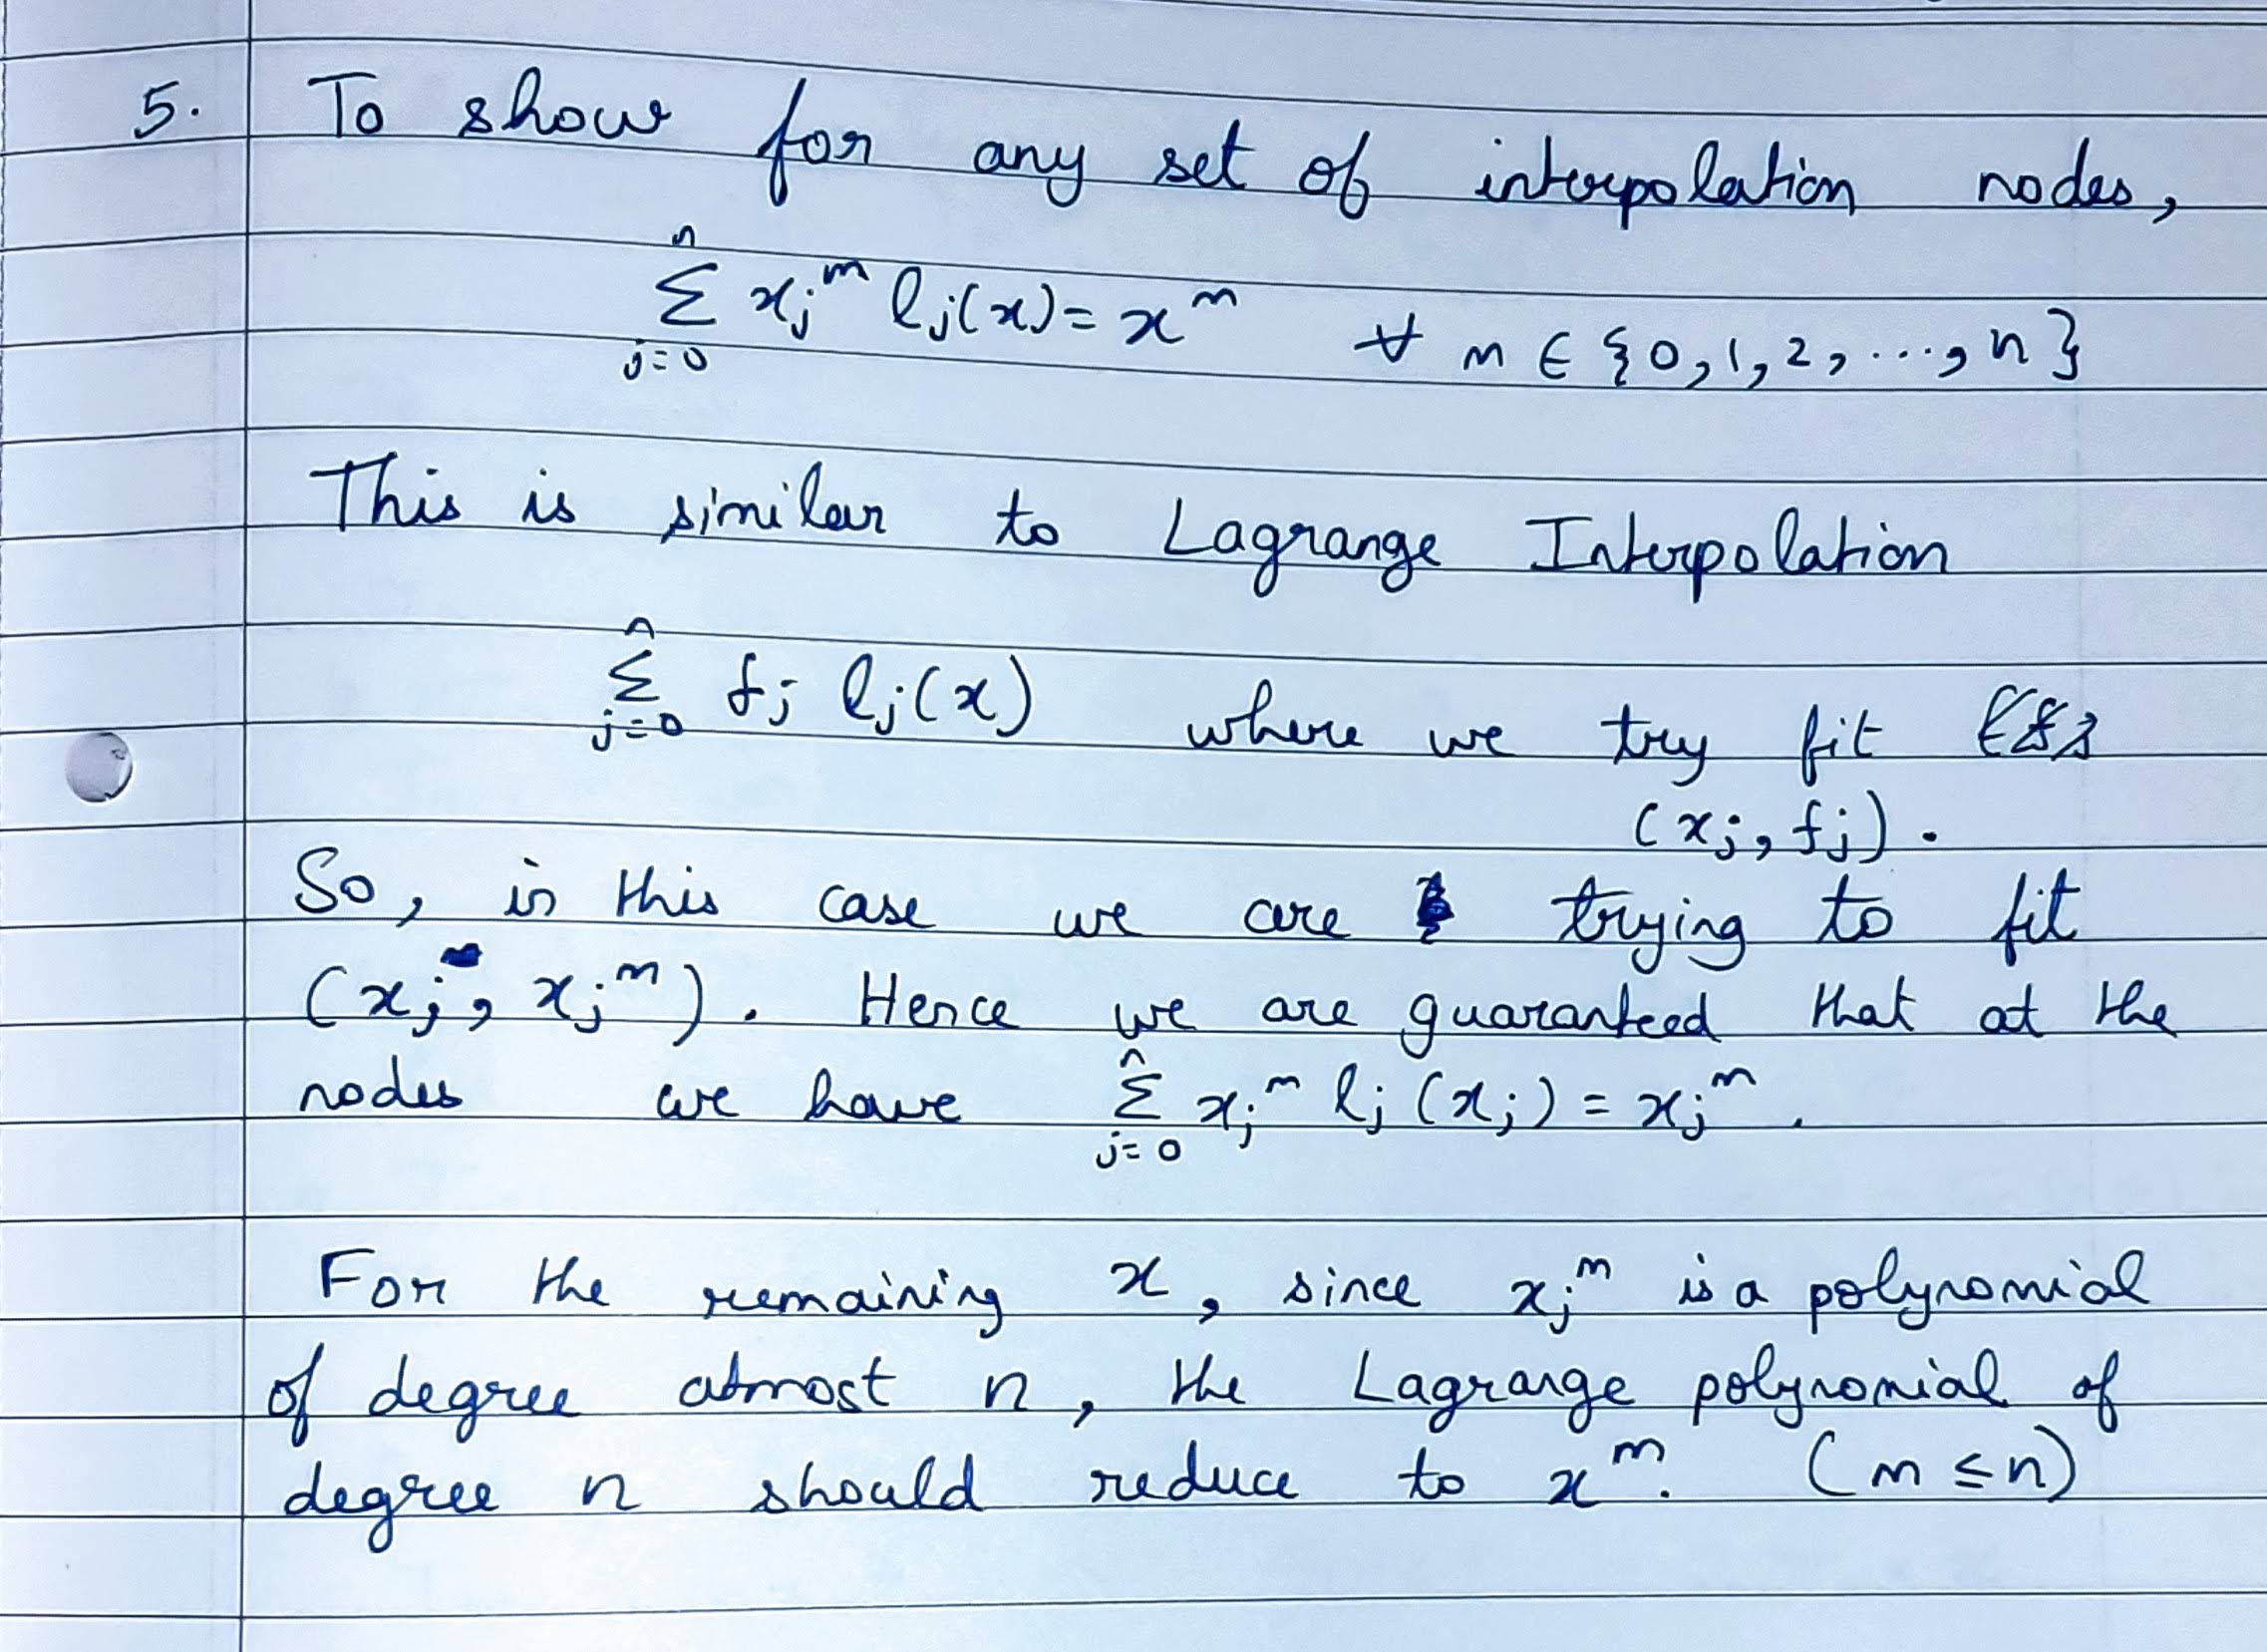

In [9]:
# Numerically Evaluating the proof for a few "m".
n = 50
M = [i for i in range(1,10)]

xnodes = np.array([-1+((2*k+1)/n) for k in range(n)])
x_values = np.linspace(-1,1,100)

def Lagrange(xnodes,x,i):
    f = 1
    nnodes = np.size(xnodes)
    for j in range(0,nnodes):
        if j==i:continue
        f = f*(x-xnodes[j])/(xnodes[i]-xnodes[j])
    return f

for m in M:
    f_values = 0
    for i in range(n):
        f_values = f_values + (xnodes[i]**m)*Lagrange(xnodes,x_values,i)
    print('For m=',m,', Maximum Relative Error=',np.max(np.abs((x_values**m-f_values)/x_values**m)),sep='')
print('and so on ...')

For m=1, Maximum Relative Error=0.003107577484976254
For m=2, Maximum Relative Error=0.00017069207510223006
For m=3, Maximum Relative Error=7.474868622292519e-05
For m=4, Maximum Relative Error=2.1963693031645803e-05
For m=5, Maximum Relative Error=7.340009870904218e-06
For m=6, Maximum Relative Error=2.4722229562401665e-06
For m=7, Maximum Relative Error=7.577476530684635e-07
For m=8, Maximum Relative Error=2.829927875487716e-06
For m=9, Maximum Relative Error=0.0001912642813010238
and so on ...


Observation:

Here we can see that the Maximum Relative Error between LHS and RHS of the equation is negligible.

#### P.S.: I am submitting the Assignment on 25/08/19 as I had missed the classes during the week of Assignment deadline. I was away to attend a conference held in China for a week and have informed Professor beforehand accordingly and asked to submit a week later.